In [426]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import NMF
import numpy.linalg as la 
import os
%matplotlib inline
pd.set_option("display.max_columns", 100)

path = '/Users/irsaashraf/Desktop/UChicago/Fall_22/MathForML/Project/Data/archive'

In [427]:
def update_H(W, H, V):
    numerator = W.T@(V)
    denominator = W.T@(W)@(H) + 1e-10
    H = H*(numerator / denominator)
    return H

def update_W(W, H, V):
    numerator = V@(H.T)
    denominator = W@(H)@(H.T) + 1e-10
    W = W*(numerator / denominator)
    return W


def do_nnmf(V, rank=10, iter=100):
    
    # Initialize 
    n, m = V.shape
    
    W = np.abs(np.random.randn(1, n, rank))[0]
    H = np.abs(np.random.randn(1, rank, m))[0]
    
    loss = []
    iters = []
    for i in range(iter):
        H = update_H(W, H, V)
        W = update_W(W, H, V)
        
        # loss.append(sum((V - W@(H)).flatten()**2))
        loss.append(np.linalg.norm((V - W@H), 'fro'))
        iters.append(i)

    return H, W, loss, iters

In [428]:
single_genre_df = pd.read_csv(os.path.join(path, 'single_genre_artists.csv'))
single_genre_df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,-13.757,1,0.0512,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,-15.375,1,0.0670,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,-15.514,1,0.0592,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,-12.393,0,0.1650,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,-13.806,1,0.1380,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [429]:
single_genre_df = single_genre_df.sample(n=200)
single_genre_df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
67691,6omzapepVVJhFxdFNBrp90,Ultra Via - Bonus Track,32,190407,1,3ObDUGvTK5W2QJqBQyIkm1,2014-11-11,0.758,0.765,6,-6.896,1,0.2160,0.2310,0.000000,0.0513,0.716,87.007,4,108888.0,['greek trap'],LEX,50
28077,1rgbO79IYd7QYe4EQtJUiX,Broken Hearted Woman - Radio Edit,28,294000,0,5uqXpAs0CMDNRWXuQvr3RQ,1992,0.823,0.651,11,-8.129,1,0.1130,0.0177,0.006960,0.0509,0.913,94.009,4,2149.0,['europop'],Jessica Jay,34
6156,6rU620Vdk8TI3sQu4UKbbQ,You're Not So Easy To Forget,3,155467,0,6OBKNqNkRe1Z5VA1TBvMuH,1956-03-31,0.531,0.190,5,-12.771,0,0.0345,0.9450,0.000000,0.1610,0.524,117.761,4,7997.0,['vocal jazz'],Morgana King,22
91757,5Ophz1hIzW8gau39HkFzQl,Croissantid,40,156774,0,2cNMMulo6S2a0tHrwX2s6i,2020-04-13,0.896,0.563,9,-6.746,0,0.0575,0.4590,0.000114,0.0943,0.851,123.982,4,38524.0,['estonian pop'],Nublu,52
54193,5u4lQGUqeANccrRG0SHLPM,"Si hablo de ti, hablo de mí",39,237987,0,563WRI9dfOxQmHUooyJgW8,2007-10-17,0.633,0.626,11,-5.538,0,0.0275,0.5000,0.000000,0.0741,0.506,141.974,4,78325.0,['chilean rock'],Natalino,46


In [430]:
### Matrix of audio-features and songs (original transposed)

cols = ['id_songs', 'duration_ms', 'explicit', 'loudness', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
single_genre_df = single_genre_df[cols]
single_genre_df = single_genre_df.set_index('id_songs')
single_genre_df = single_genre_df.transpose()
single_genre_df

id_songs,6omzapepVVJhFxdFNBrp90,1rgbO79IYd7QYe4EQtJUiX,6rU620Vdk8TI3sQu4UKbbQ,5Ophz1hIzW8gau39HkFzQl,5u4lQGUqeANccrRG0SHLPM,2HzIXUQPKLd9FDBSo7D9lM,5mvw769FihTs6dokvzhosR,31a683z6z2m4n4HDuSFyMh,6jQBSJ4yohPZLk0w1Gfk8v,3i5vO7oNZg8IimIb3kkrz9,7cboPgBezvusxZxjJ5KBqO,36vcq48Pa24MOPzhOxwZPz,3hTqUb6zkFNmRa0zvIzb20,1KgdTcnfEUrpvtocef7VtD,5pCmg3iFoIGWbRn7Ys4tZd,2ii9AFwMwp2Bk5HnQzyOAr,4UD4gM7jNCktgeou6NBJP7,5rqSpF0BsbWrKJnGqUqKbD,3rwuYQM6eEqTLWapNYAeZD,1BdAYnfsbZp9iluUcaVM8q,38QBnXuyQ0uuwZER7IF1tI,5GGL5MyJ6S99I6jF8nqbOL,100N8P8WYnz9eCYuLYGflV,7a6D9wPtTDFZs8gvVY7b6t,1JpygFzTLITCCR6YVJ3x0o,5Yhp3C2edvgSCeklFAeOvZ,1fiKyuflSCCFdlPHGRTZc1,6EMmS6SY0AWJnCJfHqSjZI,48nXZHMaiXLQP9KTVoh9Bj,1ebIrMB784Vw3vYXNX8VS6,3ZRJC5fRfIXlvk2o4eJsZd,4WbHCvwbSyqy9WtCnHAsMW,6LpbtlqwvwxnRKC3xyu1CR,6Bw44yKhJssi0wQughPuww,1lJ30a9kXpPuhQPqDAHT1M,3bsBzkNxiJ0bj6z3kDKqPh,51uGg9kpifXvzTJJgM5bqL,1OK5qjXB7YTppkNjHr12ta,3GXkYMKJ443tsH5KmOABnw,59ZKsSvEz3ymaR5lm5t6mh,1np1H7mh6iUZhdBhkh3QIo,0uwgjQkJYxD2X87PaTmWOR,1nZD1CS2jMS4YCyjAW405K,2d4Gj7aICUzTgsElo5WpKb,3i5PwReEBJBHQ2fzFClN2d,4amyxKWTvzeEREy5nGXiqc,7yaAq7FKFtjrndst1JTNoA,6swGxekW3PaVP849BJ8a3b,5ZdJQF7OsmqV5RzT7Kl5q8,4O44pPGLjy9iZPx4KFsVG3,...,48BTmdRJLtN6gyCoCHTkn3,3BXRSeYNvXomA5Xt2WZqbb,2kzHdWGfEQ4vHUS8iT3n0j,0zj4YsR3PXqwwRiG0PDwpc,3UjgxO4YfJALoSACGUBbLP,47it732a5dZoY8OJNaMyBV,5Uwu8lhTgFpuJ58Mm9TmVF,2P6cnymlCyV6CMk2DO84sa,0G2dGTf7vl4YBA1Z1bb6mK,1jpKfJ09xJor57eBI58hqz,0kOIfVOjrMJAZHyMJx1ThW,0Bb9C1P33mS5IEXMDqs0NR,4pGQaxl3T6kNjuG0fSc9JA,1v6pWaX7lINOvDTqHQv04H,4l6RfmqczLvtn2y0bE79WG,0BIGnZ1ypUAoEWQrh92D0E,5sv4fi7aFtFM7Rdp9VnwaQ,6j0oCR4YcG16Zm0NQ09Hjb,3HJBj0qOlYEjzk6hhjoEqF,6vVnGr21NUivVHFTS3BIOs,0mKYUdzfKUkxCfQXRlXg6y,3BL0wZC7fHHrssqpboSWmQ,4KMPLNHlOXlCYT5G9cf7sK,4JZhNHzFR9Pcwl6yJkCpCM,3pkEz2bdGOC8epvzPKXMlh,01k2sCY3q65GGVoe5FV30P,1lbsOispp7GJvNkoQEMTYL,2qNUmj2bZs3ys1wvmfVntK,2vGogCUrxtH98mTgk5Y3Ts,04pG9C0X69CiI1UR7oORQE,5b835TdjABZiYFoAN19DtS,7LFUDmzRyuGGBAeIV8CpyP,7MrfBf2RmFjNyON1l9VK28,0pUTgxA9cygwCRVNcq7pYi,5tU8tlGuxmCjNdl5eP9oGR,0CoZWIVqaHHGArYRTJD1V5,43DoM26O81f5uMZy7NlOcr,0VLhvJsoiqW4yiXBxm81Jr,32hlNzgjdua41gggvT9BiH,7f7Z5xOBRrXvFE9MJ4bbG8,1Xq0htouVuHOkSJxM5DZHu,6i99ThziImjuFABb8rUQvy,7HvVypq6vd8ZKQEYsNg2mC,5kHSFEtrXMjXnqSrgdg4bx,4cFzNx73J8D8kthHkkv2kl,7xXnXEsEyRLER3SCCtnHaS,7F83LctJSRI0WSNDg6x5Qn,3F3IvYLrr8OXveqsNmvmNQ,4041m5Nr5GuEaqDSq9wjXa,2briDRikOncFmv900OBcYp
duration_ms,190407.0000,294000.00000,155467.0000,156774.000000,237987.0000,140640.0000,173423.00000,109387.000,201933.000000,148793.0000,230747.0000,76920.000000,215840.0000,174472.000000,314093.000000,198467.0000,284040.0000,137729.0000,212245.000,292769.000000,244293.000000,162080.000000,218885.000,242773.0000,63259.000,259170.00000,238637.00000,228387.000000,197879.000000,437667.000,244268.000000,185151.0000,210000.000000,192400.0000,198933.000000,187493.000000,212636.0000,197960.000000,192250.000000,234733.000000,416800.0000,181760.0000,294027.0000,326259.0000,187520.000000,285859.00000,227760.0000,14840.0000,196240.000000,186413.0000,...,96333.0000,79573.000,105040.0000,295427.000,342320.000000,179947.00000,198627.0000,385306.000000,197671.000000,230813.0000,224143.0000,182253.00000,222987.00000,152867.0000,154960.000000,207867.000,173152.0000,265053.000000,179440.000,183000.000000,232133.0000,220707.0000,244920.0000,189545.0000,166547.0000,138227.0000,55722.000000,186119.0000,178427.00000,293773.000000,458120.00000,298605.000000,176853.0000,158573.000000,270600.000000,138493.0000,376518.000000,249800.0000,344321.0000,250906.00000,464333.00000,243333.00000,124460.000000,219867.00000,125263.000000,229267.000000,319303.0000,186874.000000,174787.000000,318507.0000
explicit,1.0000,0.00000,0.0000,0.000000,0.0000,0.0000,0.00000,0.000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.0000,1.000,0.000000,0.000000,0.000000,0.000,0.0000,0.000,0.00000,0.00000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,0.000000,0.0000,...

In [431]:
### Creating a dataset of genres and audio features?

### Matrix of songs and audio features 
# feats = ['id_songs', 'duration_ms', 'explicit', 'loudness', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# feats = ['id_songs', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# feats = ['id_songs', 'explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# feats = ['id_songs', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

##### NOT TRANSPOSED #####
# X_df = single_genre_df[cols]
# X_df['loudness'] = np.abs(X_df['loudness'])
# X_df = X_df.set_index('id_songs')
# X = X_df.to_numpy()
# X

##### TRANSPOSED #####
feats = ['duration_ms', 'explicit', 'loudness', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X_df = single_genre_df.loc[feats, :]
X_df.loc['loudness'] = np.abs(X_df.loc['loudness'])
X = X_df.to_numpy()
X


array([[1.90407e+05, 2.94000e+05, 1.55467e+05, ..., 1.86874e+05,
        1.74787e+05, 3.18507e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.89600e+00, 8.12900e+00, 1.27710e+01, ..., 1.01230e+01,
        6.83000e+00, 1.05180e+01],
       ...,
       [5.13000e-02, 5.09000e-02, 1.61000e-01, ..., 9.78000e-02,
        7.61000e-02, 6.64000e-02],
       [7.16000e-01, 9.13000e-01, 5.24000e-01, ..., 3.86000e-01,
        8.06000e-01, 6.46000e-01],
       [8.70070e+01, 9.40090e+01, 1.17761e+02, ..., 9.32530e+01,
        1.17792e+02, 1.67958e+02]])

In [432]:
n, p = X.shape
print(f'n = {n}')
print(f'p = {p}')
print(f'Rank of original X matrix: {la.matrix_rank(X)}')

n = 13
p = 200
Rank of original X matrix: 13


In [434]:
#### CONDUCTING NMF USING OWN CODE 

k = 20
iters = 10

H, W, loss, iters = do_nnmf(X, rank=k, iter=iters)

In [435]:
W = pd.DataFrame(W, index=X_df.index)
H = pd.DataFrame(H, columns=X_df.columns)

In [436]:
W.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
duration_ms,7.636379,9.266659e+00,2.652475,1.078060e+00,4.796165e-01,7.783987e+00,5.160168e+00,4.760643e+00,7.738094e-01,3.411201e+00,14.683378,4.987880e+00,1.756509e+01,8.452696,7.933965e+00,10.688608,8.992632e+00,8.411476e+00,1.740614,7.253587e+00
explicit,0.000005,1.562007e-08,0.000001,6.729296e-08,6.856965e-08,8.728586e-08,1.989917e-08,5.087223e-07,3.627047e-07,2.813880e-07,0.000006,1.483994e-07,3.823237e-08,0.000002,7.159117e-08,0.000001,2.311124e-11,4.821289e-07,0.000010,4.429624e-07
loudness,0.000514,3.877294e-04,0.000601,9.906040e-05,1.401592e-04,1.377493e-04,2.856516e-04,2.004632e-04,6.003600e-04,1.379145e-04,0.000537,1.000315e-04,5.788323e-04,0.000422,5.234709e-04,0.000006,2.952911e-04,9.389660e-04,0.000143,2.277625e-04
danceability,0.000013,1.344563e-05,0.000046,2.210612e-05,2.265396e-05,3.011644e-05,1.499189e-05,1.869915e-05,1.779543e-05,3.903258e-05,0.000023,1.522647e-05,5.252368e-05,0.000022,2.372766e-05,0.000003,6.408965e-06,1.219431e-07,0.000006,3.134647e-05
energy,0.000048,2.868039e-05,0.000005,9.870182e-05,4.752870e-05,3.668666e-05,5.111539e-05,4.030725e-06,1.680681e-05,2.687442e-05,0.000035,2.921783e-05,1.230010e-05,0.000006,2.597057e-06,0.000004,8.037284e-06,2.446852e-05,0.000019,6.193908e-07


In [437]:
H.head()

id_songs,6omzapepVVJhFxdFNBrp90,1rgbO79IYd7QYe4EQtJUiX,6rU620Vdk8TI3sQu4UKbbQ,5Ophz1hIzW8gau39HkFzQl,5u4lQGUqeANccrRG0SHLPM,2HzIXUQPKLd9FDBSo7D9lM,5mvw769FihTs6dokvzhosR,31a683z6z2m4n4HDuSFyMh,6jQBSJ4yohPZLk0w1Gfk8v,3i5vO7oNZg8IimIb3kkrz9,7cboPgBezvusxZxjJ5KBqO,36vcq48Pa24MOPzhOxwZPz,3hTqUb6zkFNmRa0zvIzb20,1KgdTcnfEUrpvtocef7VtD,5pCmg3iFoIGWbRn7Ys4tZd,2ii9AFwMwp2Bk5HnQzyOAr,4UD4gM7jNCktgeou6NBJP7,5rqSpF0BsbWrKJnGqUqKbD,3rwuYQM6eEqTLWapNYAeZD,1BdAYnfsbZp9iluUcaVM8q,38QBnXuyQ0uuwZER7IF1tI,5GGL5MyJ6S99I6jF8nqbOL,100N8P8WYnz9eCYuLYGflV,7a6D9wPtTDFZs8gvVY7b6t,1JpygFzTLITCCR6YVJ3x0o,5Yhp3C2edvgSCeklFAeOvZ,1fiKyuflSCCFdlPHGRTZc1,6EMmS6SY0AWJnCJfHqSjZI,48nXZHMaiXLQP9KTVoh9Bj,1ebIrMB784Vw3vYXNX8VS6,3ZRJC5fRfIXlvk2o4eJsZd,4WbHCvwbSyqy9WtCnHAsMW,6LpbtlqwvwxnRKC3xyu1CR,6Bw44yKhJssi0wQughPuww,1lJ30a9kXpPuhQPqDAHT1M,3bsBzkNxiJ0bj6z3kDKqPh,51uGg9kpifXvzTJJgM5bqL,1OK5qjXB7YTppkNjHr12ta,3GXkYMKJ443tsH5KmOABnw,59ZKsSvEz3ymaR5lm5t6mh,1np1H7mh6iUZhdBhkh3QIo,0uwgjQkJYxD2X87PaTmWOR,1nZD1CS2jMS4YCyjAW405K,2d4Gj7aICUzTgsElo5WpKb,3i5PwReEBJBHQ2fzFClN2d,4amyxKWTvzeEREy5nGXiqc,7yaAq7FKFtjrndst1JTNoA,6swGxekW3PaVP849BJ8a3b,5ZdJQF7OsmqV5RzT7Kl5q8,4O44pPGLjy9iZPx4KFsVG3,...,48BTmdRJLtN6gyCoCHTkn3,3BXRSeYNvXomA5Xt2WZqbb,2kzHdWGfEQ4vHUS8iT3n0j,0zj4YsR3PXqwwRiG0PDwpc,3UjgxO4YfJALoSACGUBbLP,47it732a5dZoY8OJNaMyBV,5Uwu8lhTgFpuJ58Mm9TmVF,2P6cnymlCyV6CMk2DO84sa,0G2dGTf7vl4YBA1Z1bb6mK,1jpKfJ09xJor57eBI58hqz,0kOIfVOjrMJAZHyMJx1ThW,0Bb9C1P33mS5IEXMDqs0NR,4pGQaxl3T6kNjuG0fSc9JA,1v6pWaX7lINOvDTqHQv04H,4l6RfmqczLvtn2y0bE79WG,0BIGnZ1ypUAoEWQrh92D0E,5sv4fi7aFtFM7Rdp9VnwaQ,6j0oCR4YcG16Zm0NQ09Hjb,3HJBj0qOlYEjzk6hhjoEqF,6vVnGr21NUivVHFTS3BIOs,0mKYUdzfKUkxCfQXRlXg6y,3BL0wZC7fHHrssqpboSWmQ,4KMPLNHlOXlCYT5G9cf7sK,4JZhNHzFR9Pcwl6yJkCpCM,3pkEz2bdGOC8epvzPKXMlh,01k2sCY3q65GGVoe5FV30P,1lbsOispp7GJvNkoQEMTYL,2qNUmj2bZs3ys1wvmfVntK,2vGogCUrxtH98mTgk5Y3Ts,04pG9C0X69CiI1UR7oORQE,5b835TdjABZiYFoAN19DtS,7LFUDmzRyuGGBAeIV8CpyP,7MrfBf2RmFjNyON1l9VK28,0pUTgxA9cygwCRVNcq7pYi,5tU8tlGuxmCjNdl5eP9oGR,0CoZWIVqaHHGArYRTJD1V5,43DoM26O81f5uMZy7NlOcr,0VLhvJsoiqW4yiXBxm81Jr,32hlNzgjdua41gggvT9BiH,7f7Z5xOBRrXvFE9MJ4bbG8,1Xq0htouVuHOkSJxM5DZHu,6i99ThziImjuFABb8rUQvy,7HvVypq6vd8ZKQEYsNg2mC,5kHSFEtrXMjXnqSrgdg4bx,4cFzNx73J8D8kthHkkv2kl,7xXnXEsEyRLER3SCCtnHaS,7F83LctJSRI0WSNDg6x5Qn,3F3IvYLrr8OXveqsNmvmNQ,4041m5Nr5GuEaqDSq9wjXa,2briDRikOncFmv900OBcYp
0,1074.959127,2101.277724,675.782766,975.636506,2058.638021,2769.910004,980.707796,669.908686,494.905705,2552.351098,209.852619,926.037984,2485.287619,2787.634668,51.516470,88.706909,1693.390258,556.747271,1784.636136,1251.565541,1002.221583,1410.860375,11.706656,1610.284300,56.376673,2142.671452,5213.587342,1765.414921,595.530038,273.350963,1728.417935,488.179792,295.501457,634.464896,3237.817542,223.889318,1623.856543,1510.583110,2573.999214,2045.828819,2323.712930,1487.667100,365.432174,1843.638676,1311.437629,1580.129246,896.861992,102.395921,2370.613726,94.995902,...,207.744563,51.973218,531.129708,1529.053542,3435.165292,1229.133541,3865.272456,2745.203399,568.640935,1210.296754,1718.137255,672.131042,1018.639654,702.760471,1709.486042,1680.492230,975.441663,864.633037,1196.901202,680.587957,1197.441727,1478.286514,1730.264597,1421.329121,2816.948220,360.855382,658.657038,99.163686,1250.445697,1255.126264,309.245767,4393.041332,433.345867,215.689290,496.037050,2015.426939,164.648700,1272.948058,751.141633,1322.953408,2637.177447,1569.644340,517.945546,1480.953181,311.488823,739.358832,757.854658,72.185217,3153.477760,5681.908082
1,17.170310,4138.318933,3011.486272,1834.447651,4140.452467,477.420762,2952.374900,142.501844,1036.460491,519.850650,3134.510157,1771.646902,1889.076397,415.877652,2942.331748,791.030524,2133.521708,2455.260088,1361.973526,3889.799574,1111.009568,485.368905,450.051661,1787.086844,103.911662,2715.406831,2548.306427,3544.253333,3288.095898,2198.313399,1878.622978,1775.350006,3928.338363,1014.121842,1602.404413,490.284164,2147.088535,825.940221,1585.001447,428.205373,162.995545,599.888322,2725.873753,4824.866461,827.403210,1906.557

In [438]:
X_hat = W@H
X_hat.head()

id_songs,6omzapepVVJhFxdFNBrp90,1rgbO79IYd7QYe4EQtJUiX,6rU620Vdk8TI3sQu4UKbbQ,5Ophz1hIzW8gau39HkFzQl,5u4lQGUqeANccrRG0SHLPM,2HzIXUQPKLd9FDBSo7D9lM,5mvw769FihTs6dokvzhosR,31a683z6z2m4n4HDuSFyMh,6jQBSJ4yohPZLk0w1Gfk8v,3i5vO7oNZg8IimIb3kkrz9,7cboPgBezvusxZxjJ5KBqO,36vcq48Pa24MOPzhOxwZPz,3hTqUb6zkFNmRa0zvIzb20,1KgdTcnfEUrpvtocef7VtD,5pCmg3iFoIGWbRn7Ys4tZd,2ii9AFwMwp2Bk5HnQzyOAr,4UD4gM7jNCktgeou6NBJP7,5rqSpF0BsbWrKJnGqUqKbD,3rwuYQM6eEqTLWapNYAeZD,1BdAYnfsbZp9iluUcaVM8q,38QBnXuyQ0uuwZER7IF1tI,5GGL5MyJ6S99I6jF8nqbOL,100N8P8WYnz9eCYuLYGflV,7a6D9wPtTDFZs8gvVY7b6t,1JpygFzTLITCCR6YVJ3x0o,5Yhp3C2edvgSCeklFAeOvZ,1fiKyuflSCCFdlPHGRTZc1,6EMmS6SY0AWJnCJfHqSjZI,48nXZHMaiXLQP9KTVoh9Bj,1ebIrMB784Vw3vYXNX8VS6,3ZRJC5fRfIXlvk2o4eJsZd,4WbHCvwbSyqy9WtCnHAsMW,6LpbtlqwvwxnRKC3xyu1CR,6Bw44yKhJssi0wQughPuww,1lJ30a9kXpPuhQPqDAHT1M,3bsBzkNxiJ0bj6z3kDKqPh,51uGg9kpifXvzTJJgM5bqL,1OK5qjXB7YTppkNjHr12ta,3GXkYMKJ443tsH5KmOABnw,59ZKsSvEz3ymaR5lm5t6mh,1np1H7mh6iUZhdBhkh3QIo,0uwgjQkJYxD2X87PaTmWOR,1nZD1CS2jMS4YCyjAW405K,2d4Gj7aICUzTgsElo5WpKb,3i5PwReEBJBHQ2fzFClN2d,4amyxKWTvzeEREy5nGXiqc,7yaAq7FKFtjrndst1JTNoA,6swGxekW3PaVP849BJ8a3b,5ZdJQF7OsmqV5RzT7Kl5q8,4O44pPGLjy9iZPx4KFsVG3,...,48BTmdRJLtN6gyCoCHTkn3,3BXRSeYNvXomA5Xt2WZqbb,2kzHdWGfEQ4vHUS8iT3n0j,0zj4YsR3PXqwwRiG0PDwpc,3UjgxO4YfJALoSACGUBbLP,47it732a5dZoY8OJNaMyBV,5Uwu8lhTgFpuJ58Mm9TmVF,2P6cnymlCyV6CMk2DO84sa,0G2dGTf7vl4YBA1Z1bb6mK,1jpKfJ09xJor57eBI58hqz,0kOIfVOjrMJAZHyMJx1ThW,0Bb9C1P33mS5IEXMDqs0NR,4pGQaxl3T6kNjuG0fSc9JA,1v6pWaX7lINOvDTqHQv04H,4l6RfmqczLvtn2y0bE79WG,0BIGnZ1ypUAoEWQrh92D0E,5sv4fi7aFtFM7Rdp9VnwaQ,6j0oCR4YcG16Zm0NQ09Hjb,3HJBj0qOlYEjzk6hhjoEqF,6vVnGr21NUivVHFTS3BIOs,0mKYUdzfKUkxCfQXRlXg6y,3BL0wZC7fHHrssqpboSWmQ,4KMPLNHlOXlCYT5G9cf7sK,4JZhNHzFR9Pcwl6yJkCpCM,3pkEz2bdGOC8epvzPKXMlh,01k2sCY3q65GGVoe5FV30P,1lbsOispp7GJvNkoQEMTYL,2qNUmj2bZs3ys1wvmfVntK,2vGogCUrxtH98mTgk5Y3Ts,04pG9C0X69CiI1UR7oORQE,5b835TdjABZiYFoAN19DtS,7LFUDmzRyuGGBAeIV8CpyP,7MrfBf2RmFjNyON1l9VK28,0pUTgxA9cygwCRVNcq7pYi,5tU8tlGuxmCjNdl5eP9oGR,0CoZWIVqaHHGArYRTJD1V5,43DoM26O81f5uMZy7NlOcr,0VLhvJsoiqW4yiXBxm81Jr,32hlNzgjdua41gggvT9BiH,7f7Z5xOBRrXvFE9MJ4bbG8,1Xq0htouVuHOkSJxM5DZHu,6i99ThziImjuFABb8rUQvy,7HvVypq6vd8ZKQEYsNg2mC,5kHSFEtrXMjXnqSrgdg4bx,4cFzNx73J8D8kthHkkv2kl,7xXnXEsEyRLER3SCCtnHaS,7F83LctJSRI0WSNDg6x5Qn,3F3IvYLrr8OXveqsNmvmNQ,4041m5Nr5GuEaqDSq9wjXa,2briDRikOncFmv900OBcYp
duration_ms,190406.998907,293999.967231,155467.018333,156774.021777,237987.011822,140640.009475,173423.002824,109387.030978,201932.997736,148793.018619,230747.017823,76920.037595,215839.986189,174472.026581,314092.977291,198467.014763,284039.978628,137729.017281,212245.021887,292768.975928,244292.994519,162080.013472,218885.027899,242773.020552,63259.047213,259170.013764,238637.011187,228386.990692,197879.008502,437666.959117,244267.986733,185151.012655,210000.034513,192400.022006,198933.027542,187493.008260,212636.028151,197960.019006,192250.000641,234732.984584,416799.951907,181760.047379,294026.985127,326258.968452,187520.020641,285858.970867,227760.017425,14839.996565,196239.995726,186412.998328,...,96333.026805,79573.053950,105040.027777,295426.967744,342319.981050,179947.013588,198626.990554,385305.938423,197671.009115,230812.998885,224143.014012,182252.983771,222987.008281,152867.013431,154960.016024,207867.020760,173152.026831,265052.979666,179440.008400,183000.011684,232133.013982,220707.004311,244919.990881,189545.028561,166547.000701,138227.045084,55722.047108,186119.008407,178427.050229,293773.005876,458119.946832,298604.979151,176853.043067,158573.023646,270599.980282,138493.002968,376517.950272,249799.985695,344320.987873,250906.005828,464332.940817,243332.998455,124460.034186,219866.986428,125263.026130,229267.023335,319302.952865,186874.002823,174787.014262,318506.991860
explicit,0.049289,0.061741,0.016905,0.024794,0.036273,0.037288,0.024572,0.021157,0.021213,0.029094,0.029600,0.011704,0.047801,0.027154,0.045839,0.025187,0.054957,0.015426,0.029939,0.048994,0.035684,0.029541,0.012381,0.050252,0.011731,0.046246,0.066964,0.047102,0.026795,0.08018

In [439]:
print(f'The sparsity of matrix W is {1 - (np.count_nonzero(W)/(W.size))}')
print(f'The sparsity of matrix H is {1 - (np.count_nonzero(H)/(H.size))}')
print(f'The sparsity of matrix X_hat is {1 - (np.count_nonzero(X_hat)/(X_hat.size))}')

The sparsity of matrix W is 0.0
The sparsity of matrix H is 0.0
The sparsity of matrix X_hat is 0.0


In [441]:
H_dict = H.idxmax(axis=0)
print(f'Number of genre clusters songs assigned to: {len(H_dict.unique())}')
print('')
H_dict.unique()

Number of genre clusters songs assigned to: 12



array([10, 12, 19,  1,  0, 14, 13, 15, 16,  5, 17, 11])

In [442]:
H_dict.to_dict()

{'6omzapepVVJhFxdFNBrp90': 10,
 '1rgbO79IYd7QYe4EQtJUiX': 10,
 '6rU620Vdk8TI3sQu4UKbbQ': 12,
 '5Ophz1hIzW8gau39HkFzQl': 19,
 '5u4lQGUqeANccrRG0SHLPM': 1,
 '2HzIXUQPKLd9FDBSo7D9lM': 0,
 '5mvw769FihTs6dokvzhosR': 1,
 '31a683z6z2m4n4HDuSFyMh': 10,
 '6jQBSJ4yohPZLk0w1Gfk8v': 12,
 '3i5vO7oNZg8IimIb3kkrz9': 0,
 '7cboPgBezvusxZxjJ5KBqO': 14,
 '36vcq48Pa24MOPzhOxwZPz': 1,
 '3hTqUb6zkFNmRa0zvIzb20': 10,
 '1KgdTcnfEUrpvtocef7VtD': 12,
 '5pCmg3iFoIGWbRn7Ys4tZd': 10,
 '2ii9AFwMwp2Bk5HnQzyOAr': 12,
 '4UD4gM7jNCktgeou6NBJP7': 13,
 '5rqSpF0BsbWrKJnGqUqKbD': 1,
 '3rwuYQM6eEqTLWapNYAeZD': 15,
 '1BdAYnfsbZp9iluUcaVM8q': 1,
 '38QBnXuyQ0uuwZER7IF1tI': 15,
 '5GGL5MyJ6S99I6jF8nqbOL': 12,
 '100N8P8WYnz9eCYuLYGflV': 12,
 '7a6D9wPtTDFZs8gvVY7b6t': 16,
 '1JpygFzTLITCCR6YVJ3x0o': 10,
 '5Yhp3C2edvgSCeklFAeOvZ': 5,
 '1fiKyuflSCCFdlPHGRTZc1': 15,
 '6EMmS6SY0AWJnCJfHqSjZI': 13,
 '48nXZHMaiXLQP9KTVoh9Bj': 1,
 '1ebIrMB784Vw3vYXNX8VS6': 10,
 '3ZRJC5fRfIXlvk2o4eJsZd': 16,
 '4WbHCvwbSyqy9WtCnHAsMW': 12,
 '6LpbtlqwvwxnRKC

In [443]:
W_dict = W.idxmax(axis=1)
print(f'Number of genre clsuters created for audio features: {len(W_dict.unique())}')
print('')
W_dict.unique()


Number of genre clsuters created for audio features: 7



array([12, 18, 17,  3, 14,  9,  6])

In [444]:
W_dict.to_dict()

{'duration_ms': 12,
 'explicit': 18,
 'loudness': 17,
 'danceability': 12,
 'energy': 3,
 'key': 12,
 'mode': 14,
 'speechiness': 17,
 'acousticness': 9,
 'instrumentalness': 17,
 'liveness': 6,
 'valence': 12,
 'tempo': 12}

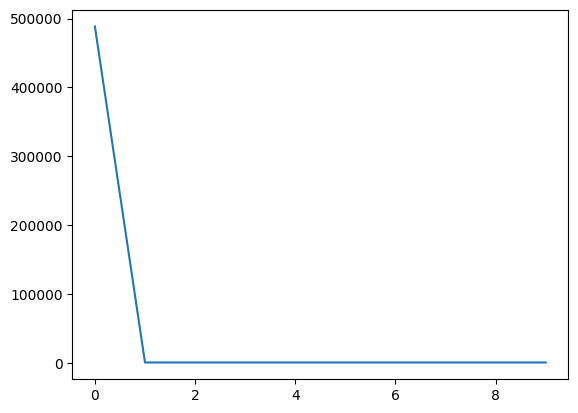

In [445]:
plt.plot(iters, loss)
plt.show()

NMath Stats provides class NMFClustering for performing data clustering using iterative nonnegative matrix factorization (NMF), where each iteration step produces a new W and H. At each iteration, each column v of V is placed into a cluster corresponding to the column w of W which has the largest coefficient in H. That is, column v of V is placed in cluster i if the entry hij in H is the largest entry in column hj of H. Results are returned as an adjacency matrix whose i, jth value is 1 if columns i and j of V are in the same cluster, and 0 if they are not. Iteration stops when the clustering of the columns of the matrix V stabilizes.